In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('D:/Kelas Work/dataset/train_house.csv')

# Menampilkan beberapa data awal
print(data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

# Penerapan  Drop NaN

In [58]:
# Mengisi nilai NaN dengan pendekatan yang sesuai
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].median())
data['Alley'] = data['Alley'].fillna('NoAlley')
data['MasVnrType'] = data['MasVnrType'].fillna(data['MasVnrType'].mode()[0])
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)
data['BsmtQual'] = data['BsmtQual'].fillna('NoBasement')
data['BsmtCond'] = data['BsmtCond'].fillna('NoBasement')
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

# Memeriksa apakah masih ada NaN yang tersisa
print(data.isnull().sum()[data.isnull().sum() > 0])

BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


# Memisahkan Data Numerikal dan Kategorikal

In [59]:
# Memisahkan kolom numerikal dan kategorikal
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

numerical_data = data[numerical_cols]
categorical_data = data[categorical_cols]

# 1D Visualization

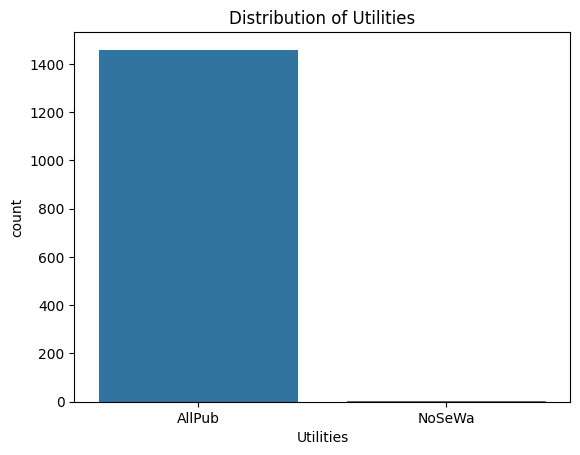

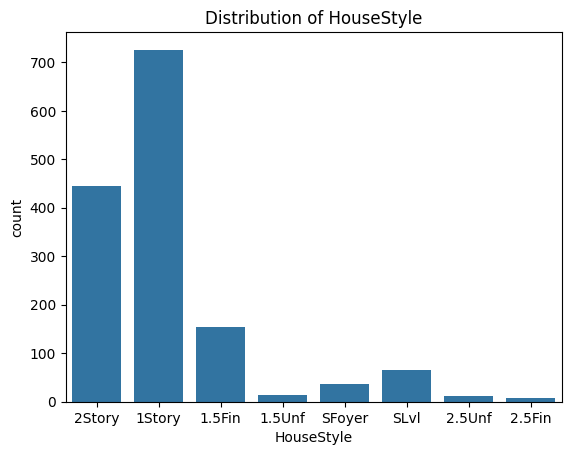

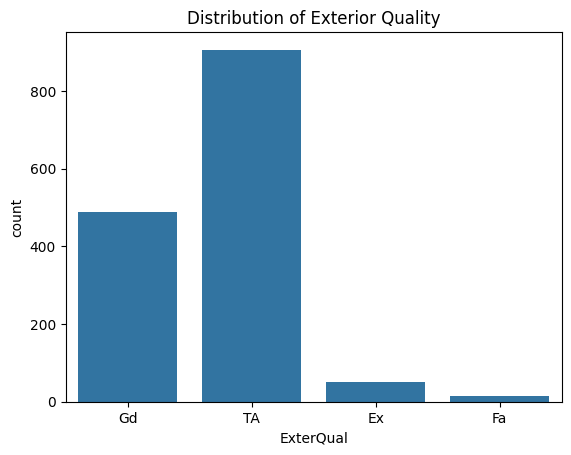

In [60]:
# Bar Chart untuk Utilities
sns.countplot(x='Utilities', data=data)
plt.title('Distribution of Utilities')
plt.show()

# Bar Chart untuk HouseStyle
sns.countplot(x='HouseStyle', data=data)
plt.title('Distribution of HouseStyle')
plt.show()

# Bar Chart untuk ExterQual
sns.countplot(x='ExterQual', data=data)
plt.title('Distribution of Exterior Quality')
plt.show()

# Visualisasi Histogram (Variabel Numerikal)

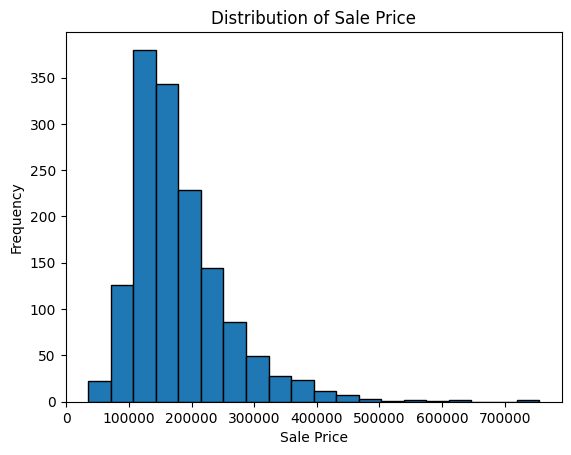

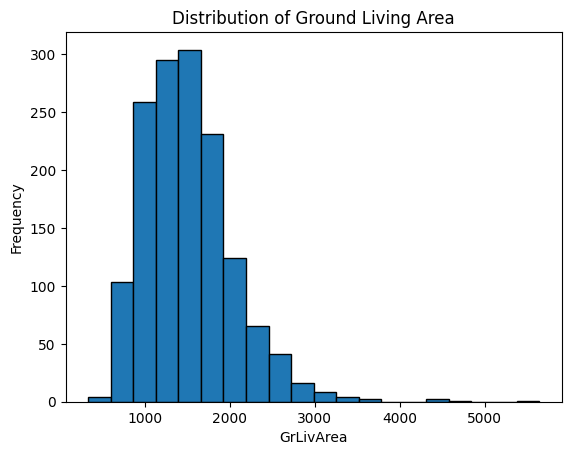

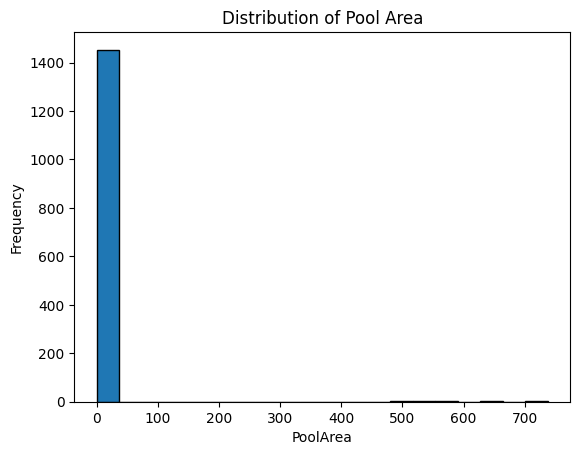

In [61]:
# Histogram untuk SalePrice
plt.hist(data['SalePrice'], bins=20, edgecolor='black')
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

# Histogram untuk GrLivArea
plt.hist(data['GrLivArea'], bins=20, edgecolor='black')
plt.title('Distribution of Ground Living Area')
plt.xlabel('GrLivArea')
plt.ylabel('Frequency')
plt.show()

# Histogram untuk PoolArea
plt.hist(data['PoolArea'], bins=20, edgecolor='black')
plt.title('Distribution of Pool Area')
plt.xlabel('PoolArea')
plt.ylabel('Frequency')
plt.show()

#  Transformasi Log-10 (Variabel Numerikal)

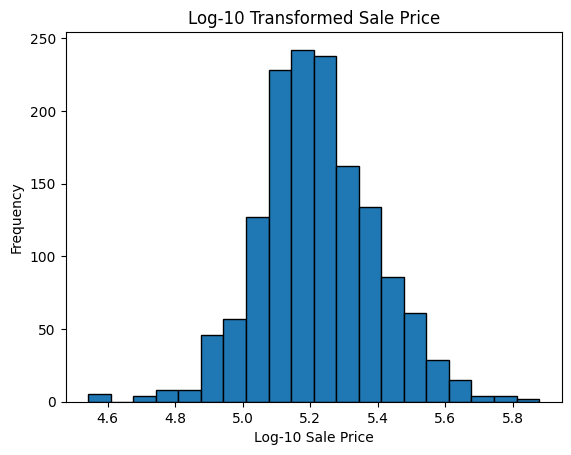

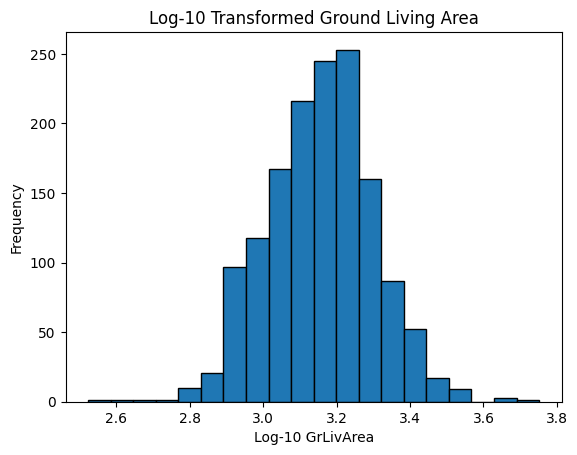

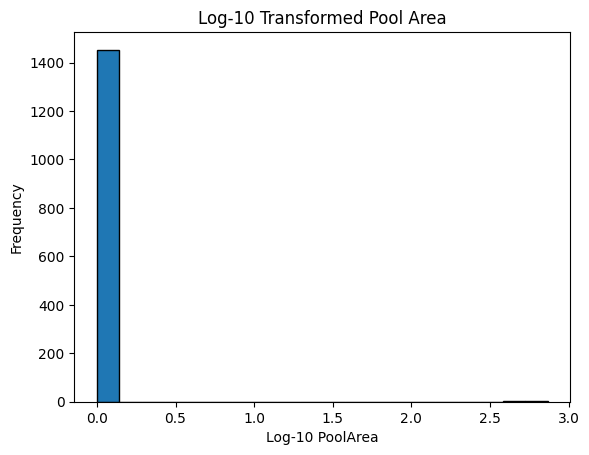

In [62]:
# Transformasi log-10 untuk SalePrice
data['log_SalePrice'] = np.log10(data['SalePrice'])
plt.hist(data['log_SalePrice'], bins=20, edgecolor='black')
plt.title('Log-10 Transformed Sale Price')
plt.xlabel('Log-10 Sale Price')
plt.ylabel('Frequency')
plt.show()

# Transformasi log-10 untuk GrLivArea
data['log_GrLivArea'] = np.log10(data['GrLivArea'])
plt.hist(data['log_GrLivArea'], bins=20, edgecolor='black')
plt.title('Log-10 Transformed Ground Living Area')
plt.xlabel('Log-10 GrLivArea')
plt.ylabel('Frequency')
plt.show()

# Transformasi log-10 untuk PoolArea
data['log_PoolArea'] = np.log10(data['PoolArea'] + 1)  # +1 untuk menghindari log(0)
plt.hist(data['log_PoolArea'], bins=20, edgecolor='black')
plt.title('Log-10 Transformed Pool Area')
plt.xlabel('Log-10 PoolArea')
plt.ylabel('Frequency')
plt.show()

# 2D Visualization

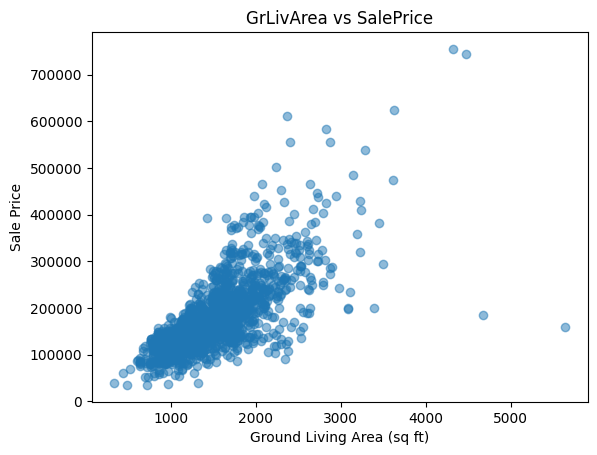

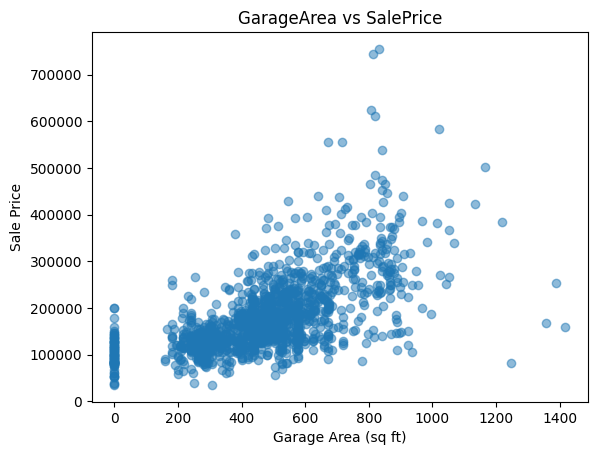

In [63]:
# Scatter plot antara GrLivArea dan SalePrice
plt.scatter(data['GrLivArea'], data['SalePrice'], alpha=0.5)
plt.title('GrLivArea vs SalePrice')
plt.xlabel('Ground Living Area (sq ft)')
plt.ylabel('Sale Price')
plt.show()

# Scatter plot antara GarageArea dan SalePrice
plt.scatter(data['GarageArea'], data['SalePrice'], alpha=0.5)
plt.title('GarageArea vs SalePrice')
plt.xlabel('Garage Area (sq ft)')
plt.ylabel('Sale Price')
plt.show()